Titanic (Data preparation)

Keep a list of functions to clean and explore the data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
import seaborn as sns

%matplotlib inline

c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


| Variable | Definition                                 | Key                       | Type |
| ---------|:------------------------------------------:| -------------------------:| ----:|
| survival | Survival                                   | 0 = No, 1 = Yes           | L    |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd | L    |
| sex      | Sex                                        |                           | L    |
| Age      | Age                                        | in years                  | N    |
| sibsp    | # of siblings / spouses aboard the Titanic	|                           | N    |
| parch    | # of parents / children aboard the Titanic	|                           | N    |
| ticket   | Ticket number                              |                           | L    |
| fare     | Passenger fare                             |                           | N    |
| cabin    | Cabin number                               |                           | L    |
| embarked | Port of Embarkation                        |                           | L    |


In [2]:
#load training data
train_raw = pandas.read_csv('train.csv', sep=',', index_col=0)

#load test data
test_raw = pandas.read_csv('test.csv', sep=',', index_col=0)



#convert non-integer column as string - train set
train_raw.Name.apply(str)
train_raw.Sex.apply(str)
train_raw.Ticket.apply(str)
train_raw.Cabin = train_raw.Cabin.replace(np.nan, '', regex=True)
train_raw.Cabin.apply(str)
train_raw.Embarked.apply(str)
train_raw.Embarked = train_raw.Embarked.replace(np.nan, '', regex=True)

display(train_raw[0:10])
print(train_raw.dtypes)

#convert non-integer column as string - test set
test_raw.Name.apply(str)
test_raw.Sex.apply(str)
test_raw.Ticket.apply(str)
test_raw.Cabin = test_raw.Cabin.replace(np.nan, '', regex=True)
test_raw.Cabin.apply(str)
test_raw.Embarked.apply(str)
test_raw.Embarked = test_raw.Embarked.replace(np.nan, '', regex=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [3]:
# Enhance the data-set - train set
def convert_name_to_salutation(name):
    name_t = name.lower()
    salutations = ['mrs.', 'mr.', 'ms.', 'mlle.', 'miss.', 'sir.', 'rev.', 'mme.', 'master.', 'major.',
                  'lady.', 'jonkheer.', 'dr.', 'don.', 'col.', 'capt.', 'countess.']
    
    for sal in salutations:
        if sal in name_t:
            return sal
        
    return 'none'
    
def convert_cabin_to_area(cabin):
    areas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
    cabin_t = str(cabin).upper()
    
    for area in areas:
        if area in cabin_t:
            return area
    
    return 'none'

def discrete_age(age):
    if math.isnan(age):
        return 0
    for i in range(0, 101, 10):
        if(age < i):
            return i
        
def discrete_fare(fare):
    if math.isnan(fare):
        return 0
    for i in range(0, 601, 50):
        if(fare < i):
            return i

def add_salutation_col(df):
    df['Salutation'] = df['Name'].map(lambda x: convert_name_to_salutation(x))
    
def add_carbin_area_col(df):
    df['CabinArea'] = df['Cabin'].map(lambda x: convert_cabin_to_area(x))
    
def add_age_dis_col(df):
    df['AgeDiscrete'] = df['Age'].map(lambda x: discrete_age(x))
    
def add_fare_dis_col(df):
    df['FareDiscrete'] = df['Fare'].map(lambda x: discrete_fare(x))
    
def add_family_member_col(df):
    df['FamilyMember'] = df['SibSp'] + df['Parch']
    
add_salutation_col(train_raw)
add_carbin_area_col(train_raw)
add_age_dis_col(train_raw)
add_fare_dis_col(train_raw)
add_family_member_col(train_raw)

display(train_raw[0:10])

# Enhance the data-set - test set
add_salutation_col(test_raw)
add_carbin_area_col(test_raw)
add_age_dis_col(test_raw)
add_fare_dis_col(test_raw)
add_family_member_col(test_raw)

display(test_raw[0:10])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,AgeDiscrete,FareDiscrete,FamilyMember
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,mr.,none,30,50,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs.,C,40,100,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,miss.,none,30,50,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs.,C,40,100,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,mr.,none,40,50,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q,mr.,none,0,50,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mr.,E,60,100,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S,master.,none,10,50,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S,mrs.,none,30,50,2


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,AgeDiscrete,FareDiscrete,FamilyMember
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,mr.,none,40,50,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,mrs.,none,50,50,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,mr.,none,70,50,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,mr.,none,30,50,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,mrs.,none,30,50,2
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,mr.,none,20,50,0
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,miss.,none,40,50,0
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,mr.,none,30,50,2
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,mrs.,none,20,50,0


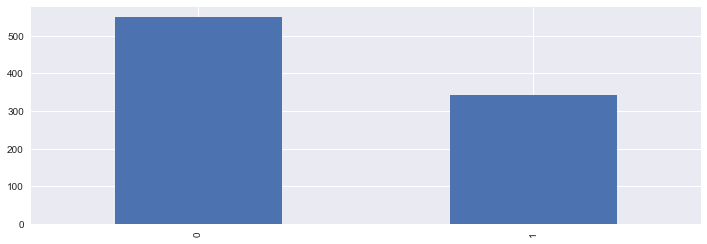

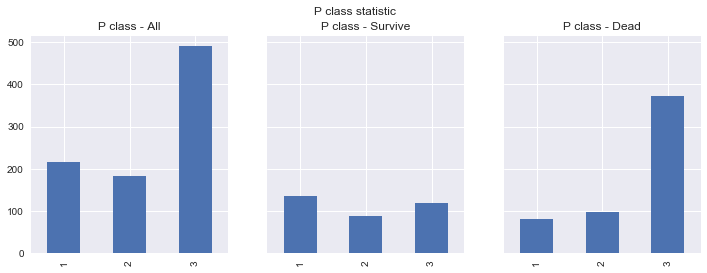

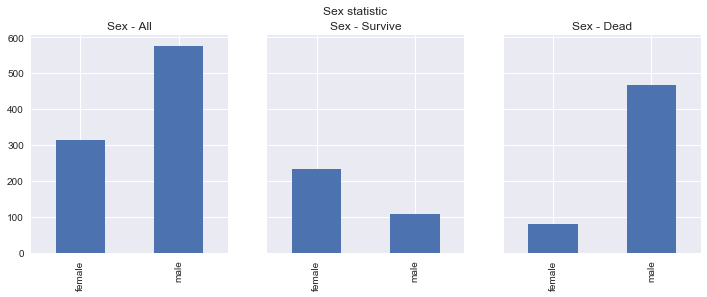

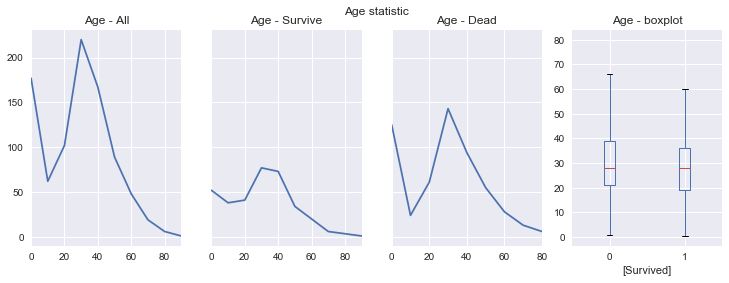

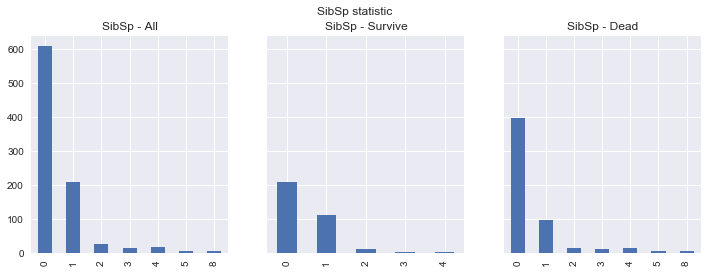

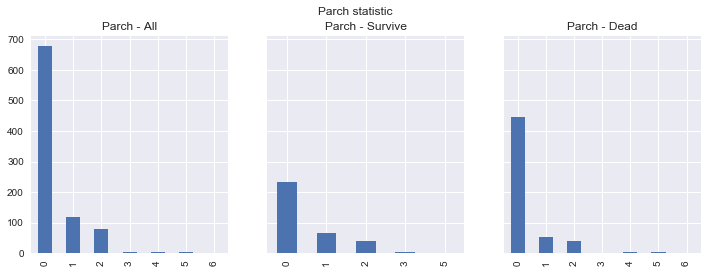

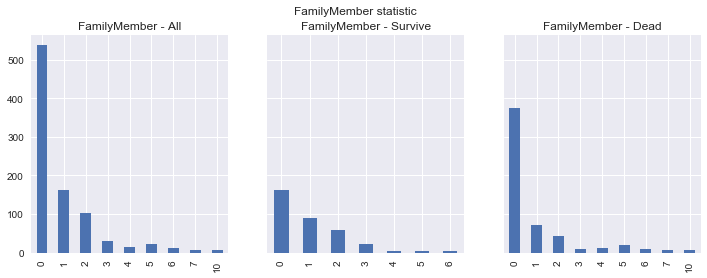

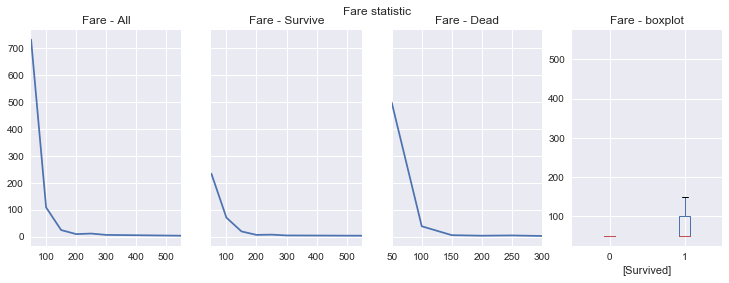

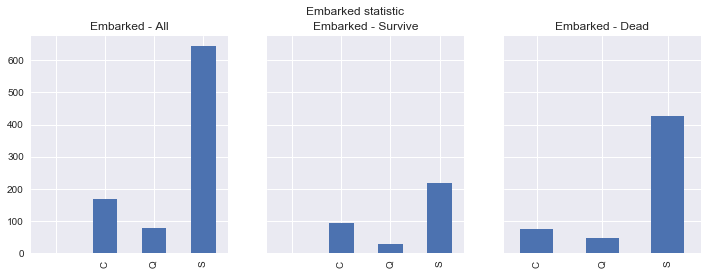

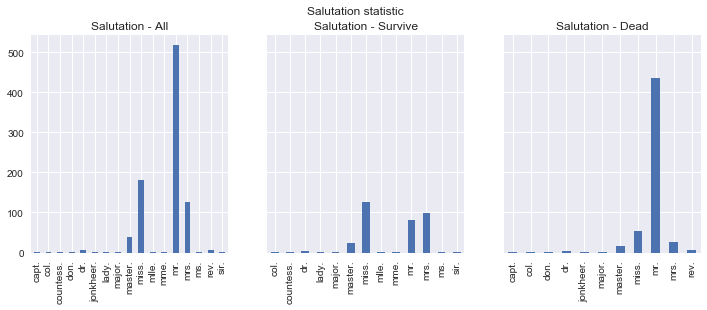

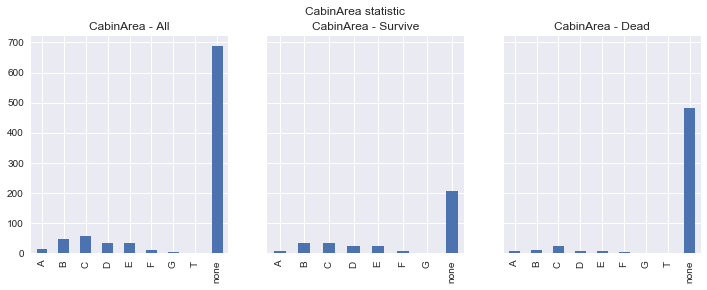

In [4]:
fig = plt.figure(figsize=(12,4))
train_raw["Survived"].value_counts().sort_index().plot.bar()

# Visualize data and the corresponding labels
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["Pclass"].value_counts().sort_index().plot.bar()
ax1.set_title('P class - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["Pclass"].value_counts().sort_index().plot.bar()
ax2.set_title('P class - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["Pclass"].value_counts().sort_index().plot.bar()
ax3.set_title('P class - Dead')
plt.suptitle('P class statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["Sex"].value_counts().sort_index().plot.bar()
ax1.set_title('Sex - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["Sex"].value_counts().sort_index().plot.bar()
ax2.set_title('Sex - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["Sex"].value_counts().sort_index().plot.bar()
ax3.set_title('Sex - Dead')
plt.suptitle('Sex statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(141)
train_raw["AgeDiscrete"].value_counts().sort_index().plot.line()
ax1.set_title('Age - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_raw[train_raw.Survived==1]["AgeDiscrete"].value_counts().sort_index().plot.line()
ax2.set_title('Age - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_raw[train_raw.Survived==0]["AgeDiscrete"].value_counts().sort_index().plot.line()
ax3.set_title('Age - Dead')

ax4 = fig.add_subplot(144)
train_raw[["Age","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Age - boxplot')

plt.suptitle('Age statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["SibSp"].value_counts().sort_index().plot.bar()
ax1.set_title('SibSp - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["SibSp"].value_counts().sort_index().plot.bar()
ax2.set_title('SibSp - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["SibSp"].value_counts().sort_index().plot.bar()
ax3.set_title('SibSp - Dead')

plt.suptitle('SibSp statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["Parch"].value_counts().sort_index().plot.bar()
ax1.set_title('Parch - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["Parch"].value_counts().sort_index().plot.bar()
ax2.set_title('Parch - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["Parch"].value_counts().sort_index().plot.bar()
ax3.set_title('Parch - Dead')

plt.suptitle('Parch statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["FamilyMember"].value_counts().sort_index().plot.bar()
ax1.set_title('FamilyMember - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["FamilyMember"].value_counts().sort_index().plot.bar()
ax2.set_title('FamilyMember - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["FamilyMember"].value_counts().sort_index().plot.bar()
ax3.set_title('FamilyMember - Dead')

plt.suptitle('FamilyMember statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(141)
train_raw["FareDiscrete"].value_counts().sort_index().plot.line()
ax1.set_title('Fare - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_raw[train_raw.Survived==1]["FareDiscrete"].value_counts().sort_index().plot.line()
ax2.set_title('Fare - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_raw[train_raw.Survived==0]["FareDiscrete"].value_counts().sort_index().plot.line()
ax3.set_title('Fare - Dead')

ax4 = fig.add_subplot(144)
train_raw[["FareDiscrete","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Fare - boxplot')

plt.suptitle('Fare statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["Embarked"].value_counts().sort_index().plot.bar()
ax1.set_title('Embarked - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["Embarked"].value_counts().sort_index().plot.bar()
ax2.set_title('Embarked - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["Embarked"].value_counts().sort_index().plot.bar()
ax3.set_title('Embarked - Dead')

plt.suptitle('Embarked statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["Salutation"].value_counts().sort_index().plot.bar()
ax1.set_title('Salutation - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["Salutation"].value_counts().sort_index().plot.bar()
ax2.set_title('Salutation - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["Salutation"].value_counts().sort_index().plot.bar()
ax3.set_title('Salutation - Dead')

plt.suptitle('Salutation statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_raw["CabinArea"].value_counts().sort_index().plot.bar()
ax1.set_title('CabinArea - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_raw[train_raw.Survived==1]["CabinArea"].value_counts().sort_index().plot.bar()
ax2.set_title('CabinArea - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_raw[train_raw.Survived==0]["CabinArea"].value_counts().sort_index().plot.bar()
ax3.set_title('CabinArea - Dead')

plt.suptitle('CabinArea statistic')

,Survived,Pclass,Sex,SibSp,Parch,FamilyMember,Embarked,Salutation,CabinArea,AgeDiscrete,FareDiscrete
PassengerId,,,,,,,,,,,
1,0,2,1,1,0,1,3,12,8,3,0
2,1,0,0,1,0,1,1,13,2,4,1
3,1,2,0,0,0,0,3,9,8,3,0
4,1,0,0,1,0,1,3,13,2,4,1
5,0,2,1,0,0,0,3,12,8,4,0
6,0,2,1,0,0,0,2,12,8,0,0
7,0,0,1,0,0,0,3,12,4,6,1
8,0,2,1,3,1,4,3,8,8,1,0
9,1,2,0,0,2,2,3,13,8,3,0


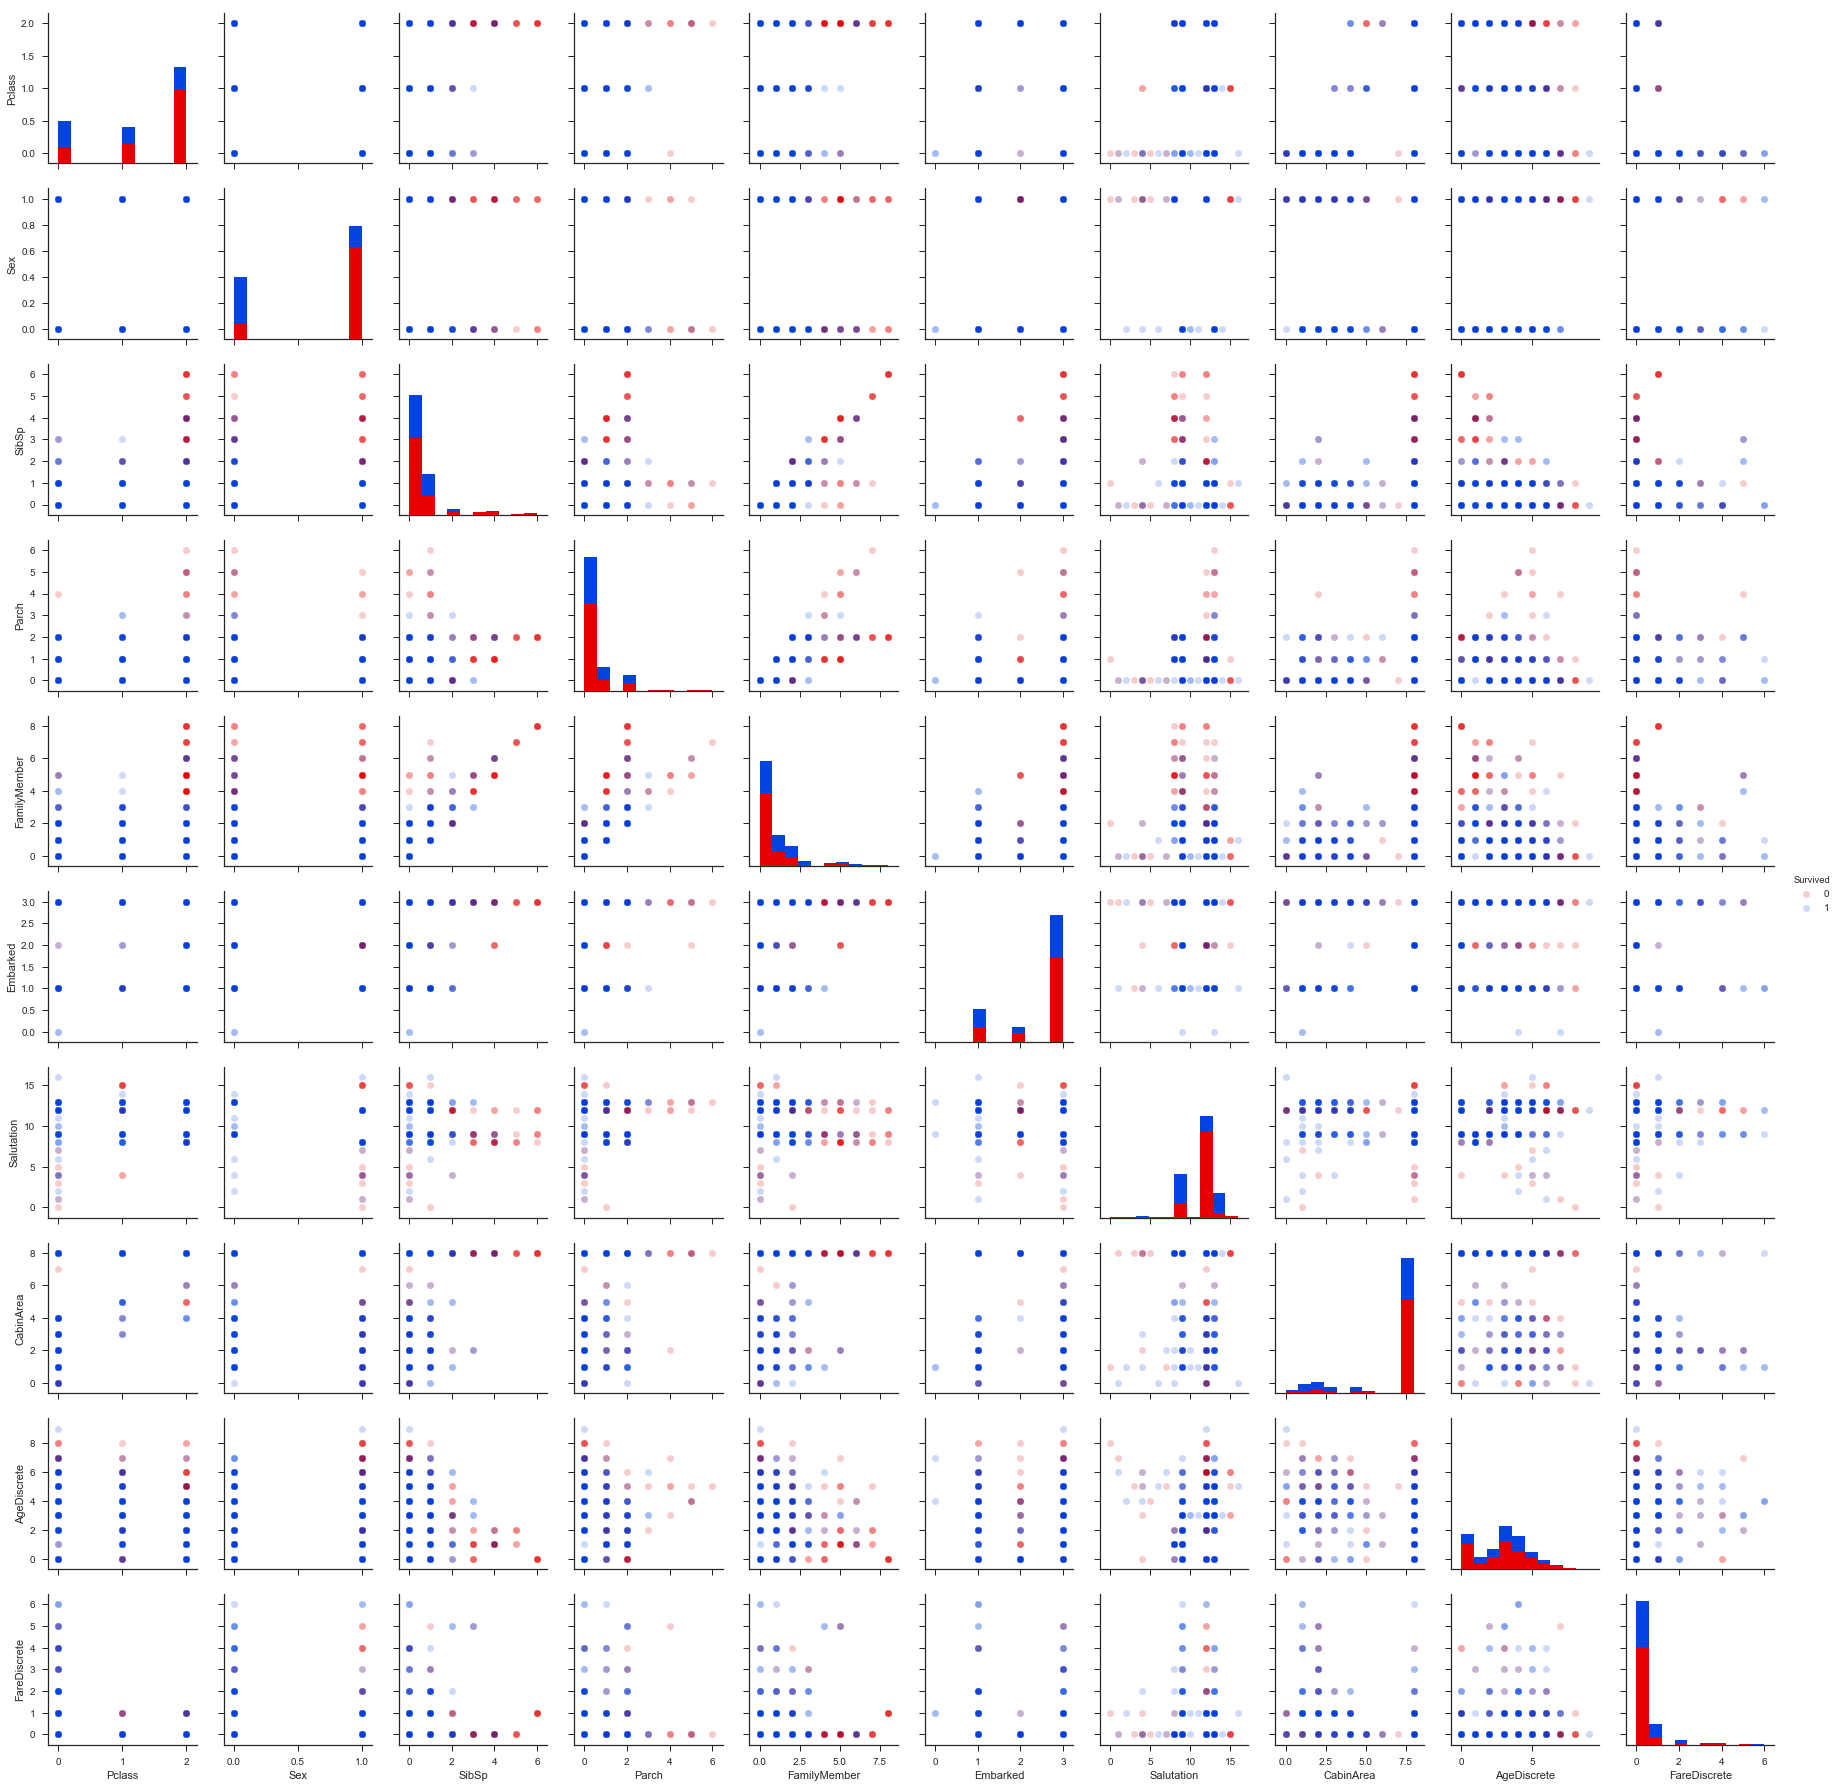

In [5]:
sns.set(style="ticks")
train_raw_pair = train_raw[["Survived", "Pclass", "Sex", "SibSp", \
                        "Parch", "FamilyMember", "Embarked", "Salutation", "CabinArea", "AgeDiscrete", "FareDiscrete"]]
train_raw_pair = train_raw_pair.apply(LabelEncoder().fit_transform)

display(train_raw_pair[0:10])

colors = ["red", "blue"]
sns.pairplot(train_raw_pair, hue="Survived", 
             vars=["Pclass", "Sex", "SibSp", "Parch", "FamilyMember", "Embarked", "Salutation", "CabinArea", "AgeDiscrete", "FareDiscrete"], 
             plot_kws=dict(alpha=.2), palette=sns.xkcd_palette(colors))

What we have learn?
1. Female is more likely to survive
2. Class 1 is more likely to survive
3. Travelling alone is deadly
4. Having cabin is more likely to survive


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from six.moves import cPickle as pickle

sel_cols= ["Pclass", "Sex", "SibSp", \
                        "Parch", "FamilyMember", "Embarked", "Salutation", "CabinArea", "AgeDiscrete", "FareDiscrete"]
#create train and test set
full_dataset = pandas.concat([train_raw[sel_cols], test_raw[sel_cols]])
full_dataset = full_dataset.apply(LabelEncoder().fit_transform)

#create train and test dataset
train_dataset = full_dataset[:len(train_raw)]
test_dataset = full_dataset[len(train_raw):]

#create train label
train_label = train_raw["Survived"]

try:
    set_filename = "train_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "test_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(test_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "train_label.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_label, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)

Test the quality of the dataset by building a quick model and submit to Kaggle

In [7]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(train_dataset, train_label, test_size=test_size)

clf = RandomForestClassifier(n_estimators=5, max_features=3, max_depth=3, min_samples_split=2, random_state=0)      
clf.fit(X_train, y_train)

# make predictions for test data
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.07%


In [8]:
r_pred = clf.predict(test_dataset)
r_predictions = [int(round(value)) for value in r_pred]

submission_df = pandas.DataFrame(index=test_dataset.index, columns=["Survived"])
submission_df["Survived"] = r_predictions
submission_df.to_csv("submission_rf.csv", sep=',')

Point left not yet implemented.

1. t-SNE
2. missing value

In [12]:
import sklearn.manifold

tsne = sklearn.manifold.TSNE()
X_reduce = tsne.fit_transform(X_train)

array([[ 17.32443042,  -8.41479458],
       [-10.53276518,  11.28750341],
       [  2.74338885, -19.11924618],
       ..., 
       [-10.75225983, -22.10351706],
       [-10.16021941, -22.08634191],
       [ -2.22053664,  14.35498302]])

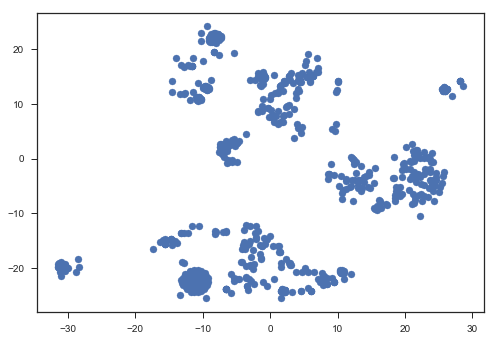

In [14]:
plt.scatter(*zip(*X_reduce))
plt.show()